# Naive Bayes classifier for solenoid features (angle and level)

In [153]:
import os
import sys
import importlib
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# pyaldata
sys.path.append("/home/zms24/Desktop") 
import PyalData.pyaldata as pyal # type:ignore

# tools functions
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from tools.dsp.preprocessing import preprocess

np.random.seed(0)

# imports for PCA and classifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

## Load in pyaldata files and preprocess

M044

In [75]:
def preprocess_m044():
    data_dir = "/data/raw/M044/M044_2024_12_04_09_30"
    mat_file = "M044_2024_12_04_09_30_pyaldata.mat"
    fname = os.path.join(data_dir, mat_file)
    df = pyal.mat2dataframe(fname, shift_idx_fields=True)

    df_ = preprocess(df, only_trials=True)
    df_["M1_rates"] = [trial[:, 300:] for trial in df_["all_rates"]]
    df_["Dls_rates"] = [trial[:, :300] for trial in df_["all_rates"]]
    df_ = df_.drop(columns="all_spikes") # the content is incorrect
    areas = ["M1_rates", "Dls_rates", "all_rates"]
    df_.reset_index(drop=False, inplace=True) # reset index

    session_id = mat_file.replace("_pyaldata.mat", "")
    mouse = session_id.split('_')[0]
    bin_size = df['bin_size'][0]
    perturb_time_idx = df_.idx_sol_on[0]

    sol_angles = sorted(df_.values_Sol_direction.unique())

    m044_dict = {'data': df_,
                 'brain_areas': areas,
                 'session_id': session_id,
                 'mouse': mouse,
                 'bin_size': bin_size,
                 'perturb_time_idx': perturb_time_idx,
                 'categories': sol_angles
                 }
    return m044_dict

In [76]:
M044_data = preprocess_m044()

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field all_KSLabel could not be converted to int.


/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(


Combined every 3 bins
Resulting all_spikes ephys data shape is (NxT): (474, 133)


M061

In [ ]:
def preprocess_m061():

    ### First session ###
    data_dir = "/data/raw/M061/M061_2025_03_04_10_00"
    mat_file_0= "M061_2025_03_04_10_00_pyaldata_0.mat"
    mat_file_1= "M061_2025_03_04_10_00_pyaldata_1.mat"
    mat_file_2= "M061_2025_03_04_10_00_pyaldata_2.mat"

    fname0 = os.path.join(data_dir, mat_file_0)
    fname1 = os.path.join(data_dir, mat_file_1)
    fname2 = os.path.join(data_dir, mat_file_2)

    df0 = pyal.mat2dataframe(fname0, shift_idx_fields=True)
    df1 = pyal.mat2dataframe(fname1, shift_idx_fields=True)
    df2 = pyal.mat2dataframe(fname2, shift_idx_fields=True)
    df = pd.concat([df0, df1, df2], ignore_index=True)
    df = df.drop(columns="all_spikes") # the content is incorrect

    df_ = preprocess(df, only_trials=True)
    bin_size = df_['bin_size'][0]

    areas =[ "MOp_rates", "SSp_ul_rates", "CP_rates", "Thal_rates"]
    df_ = pyal.merge_signals(df_, areas, "all_rates")
    df_['trial_length'] = (df_['trial_length'] / (bin_size * 100)).astype(int)
    df_ = df_[df_['trial_length'] == 200]

    session_id = mat_file_0.replace("_pyaldata_0.mat", "")
    mouse = session_id.split('_')[0]
    perturb_time_idx = df_.idx_sol_on[0]
    sol_angles = sorted(df_.values_Sol_direction.unique())

    session0_m061 = {'data': df_,
                 'brain_areas': areas,
                 'session_id': session_id,
                 'mouse': mouse,
                 'bin_size': bin_size,
                 'perturb_time_idx': perturb_time_idx,
                 'categories': sol_angles
                 }
    
    ### Second session ###
    data_dir = "/data/raw/M061/M061_2025_03_06_14_00"
    mat_file_0= "M061_2025_03_06_14_00_pyaldata_0.mat"
    mat_file_1= "M061_2025_03_06_14_00_pyaldata_1.mat"

    fname0 = os.path.join(data_dir, mat_file_0)
    fname1 = os.path.join(data_dir, mat_file_1)

    df0 = pyal.mat2dataframe(fname0, shift_idx_fields=True)
    df1 = pyal.mat2dataframe(fname1, shift_idx_fields=True)
    df = pd.concat([df0, df1], ignore_index=True)
    df = df.drop(columns="all_spikes") # the content is incorrect

    df_ = preprocess(df, only_trials=True)

    bin_size = df_['bin_size'][0]
    areas =[ "MOp_rates", "SSp_rates", "CP_rates", "VAL_rates"]
    df_ = pyal.merge_signals(df_, areas, "all_rates")

    # correct trial length - this is an error in pyaldata
    df_['trial_length'] = (df_['trial_length'] / (bin_size * 100)).astype(int)
    df_ = df_[df_['trial_length'] == 200]

    session_id = mat_file_0.replace("_pyaldata_0.mat", "")
    perturb_time_idx = df_.idx_sol_on[0]
    sol_angles = sorted(df_.values_Sol_direction.unique())

    session1_m061 = {'data': df_,
                 'brain_areas': areas,
                 'session_id': session_id,
                 'mouse': mouse,
                 'bin_size': bin_size,
                 'perturb_time_idx': perturb_time_idx,
                 'categories': sol_angles
                 }
    return [session0_m061, session1_m061]

In [16]:
M061_data = preprocess_m061()

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field SSp_ul_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field Thal_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
field idx_motion could not be converted to int.
array field SSp_ul_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field Thal_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
field values_Sol_direction could not be converted to int.
field idx_Sol_direction could not be converted to int.
field values_Sol_duration could not be converted to int.
field idx_Sol_duration could not be converted to int.
field idx_sol_on could not be converted to 

/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(


Combined every 3 bins
Resulting SSp_ul_spikes ephys data shape is (NxT): (59, 200)
Resulting Thal_spikes ephys data shape is (NxT): (240, 200)
Resulting MOp_spikes ephys data shape is (NxT): (206, 200)
Resulting CP_spikes ephys data shape is (NxT): (356, 200)
field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field GPe_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array fi

/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_X might be a time-varying field. It matches the length of SSp_spikes on 99.85052316890882% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_X might be a time-varying field. It matches the length of SSp_spikes on 99.85052316890882% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_Y might be a time-varying field. It matches the length of SSp_spikes on 99.85052316890882% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_Y might be a time-varying field. It matches the length of SSp_spikes on 99.85052316890882% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108

Combined every 3 bins
Resulting SSp_spikes ephys data shape is (NxT): (69, 200)
Resulting VAL_spikes ephys data shape is (NxT): (168, 200)
Resulting MOp_spikes ephys data shape is (NxT): (178, 200)
Resulting CP_spikes ephys data shape is (NxT): (172, 200)
Resulting GPe_spikes ephys data shape is (NxT): (120, 200)


M062

In [ ]:
def preprocess_m062():
    return [session0_m062, session1_m062, session2_m062]

In [ ]:
M062_data = preprocess_m062()

## Prepare data for classifier

In [ ]:
def restrict_time_interval(df, brain_areas, bin_start, length):
    interval_df = df.copy()
    interval_df[brain_areas] = df[brain_areas].apply(lambda row: row.apply(lambda arr: arr[bin_start:bin_start+length, :]))
    interval_df['trial_length'] = length
    return interval_df

def concat_and_pca(df, brain_areas):
    # concat trials
    concat_data = []
    for area in brain_areas:
        data = pyal.concat_trials(df, area)
        concat_data.append(data)
    
    # pca and reverse concat
    n_dim = 50
    reverse_concat_data = []
    for data in concat_data:
        pca = PCA(n_components = n_dim)
        pc_data = pca.fit_transform(data)
        reverse_data = pyal.reverse_concat(pc_data, df)
        reverse_concat_data.append(reverse_data)

    return reverse_concat_data

def label_data(df, pca_data, categories):
    labeled_data = []
    for data in pca_data:
        data_dict = {cat:[] for cat in categories}
        for cat in categories:
            for index, row in df.iterrows():
                if df.values_Sol_direction[index] == cat:
                    data_dict[cat].append(data[index])
                    
        labeled_data.append(data_dict)

    return labeled_data

In [86]:
def pre_decoder_processing(labeled_data, categories):
    reshaped_data = []
    for X_data in labeled_data:
        # shuffle within each category
        data_X = shuffle_data(X_data, categories)
        # get minimum sample
        min_samples = minimum_samples(data_X, categories)
        # chop to minimum samples and concat for X and y data
        X_balanced_reshaped, y_balanced_reshaped = balance_and_reshape(data_X, categories, min_samples)
        # return lists ready for train-test split
        reshaped_data.append([X_balanced_reshaped, y_balanced_reshaped])
        
    return reshaped_data

def shuffle_data(df, categories):
    for cat in categories:
        random.shuffle(df[cat])
    return df

def minimum_samples(df, categories):
    min_samples = min(len(df[cat]) for cat in categories)
    return min_samples

def balance_and_reshape(X_data, categories, min_samples):
    # chop to min_sample size and combine
    X_balanced = []
    y_balanced = []
    for cat in categories:
        X_balanced.append(X_data[cat][0:min_samples])
        y_balanced.append(np.full(min_samples, cat))

    # concatenate all together
    X_balanced = np.concatenate(X_balanced, axis=0)
    y_balanced = np.concatenate(y_balanced, axis=0)

    # convert to 2d array (needed for the NB classifier)
    X_balanced_reshaped = np.array(X_balanced.reshape(len(X_balanced), -1))
    y_balanced_reshaped = np.array(y_balanced.reshape(len(y_balanced), -1))

    return [X_balanced_reshaped, y_balanced_reshaped]

In [123]:
def decode_and_score(clf, X_balanced_reshaped, y_balanced_reshaped, test_size, k_splits):
    X_train, X_test, y_train, y_test = train_test_split(X_balanced_reshaped, y_balanced_reshaped, test_size=0.1, random_state=0)
    # train classifier
    clf.fit(X_train, y_train.ravel())
    # make predictions
    predictions_control = clf.predict(X_train)
    predictions = clf.predict(X_test)
    # calculate accuracy
    accuracy_control = accuracy_score(y_train, predictions_control)
    # print(f"Control accuracy score on training data: {accuracy_control}")
    accuracy = accuracy_score(y_test, predictions)
    # print(f"Test set ({test_size*100}% of data) accuracy: {accuracy}")
    # k-fold validation
    kf = KFold(n_splits=k_splits, shuffle=True, random_state=44)
    # Perform k-fold cross-validation
    scores = cross_val_score(clf, X_balanced_reshaped, y_balanced_reshaped.ravel(), cv=kf)
    # print(f"Mean k-fold score: {np.mean(scores)}")
    return clf, scores

def classify(reshaped_data, test_size = 0.1, k_splits = 6):
    scores = []
    for data in reshaped_data:
        X_data, y_data = data

        clf = GaussianNB()
        clf, score = decode_and_score(clf, X_data, y_data, test_size, k_splits)
        scores.append(score)
    return scores

In [124]:
def naive_bayes_classifier(data, start_time, length):
    m044_df_interval = restrict_time_interval(data['data'], data['brain_areas'], start_time, length)

    m044_pca_data = concat_and_pca(m044_df_interval, data['brain_areas'])

    m044_labeled_data = label_data(m044_df_interval, m044_pca_data, data['categories'])

    m044_reshaped = pre_decoder_processing(m044_labeled_data, data['categories'])

    m044_classifier_scores = classify(m044_reshaped, test_size = 0.1, k_splits = 6)

    return m044_classifier_scores

### Testing different window lengths

In [135]:
window_lengths = np.arange(1, 106, 5)
start_time = M044_data['perturb_time_idx']
scores = []
for window_length in window_lengths:
    score = naive_bayes_classifier(M044_data, start_time, window_length)
    scores.append(score)
scores = np.array(scores)

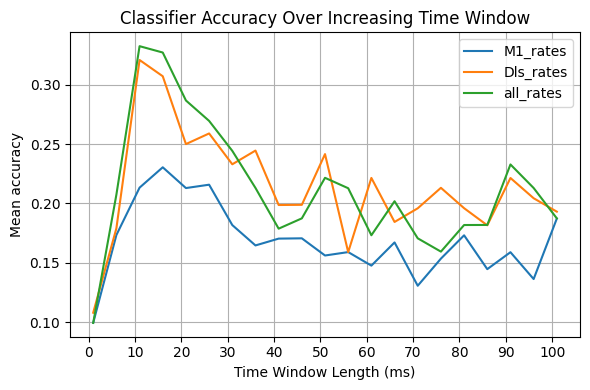

In [156]:
fig = plt.figure(figsize=(6, 4))

for cat in range(len(M044_data['brain_areas'])):
    brain_area = M044_data['brain_areas'][cat]
    area_scores = []

    for length in range(len(window_lengths)):
        mean_score = np.mean(scores[length][cat])  # Average over 6 folds
        area_scores.append(mean_score)

    plt.plot(window_lengths, area_scores, label=brain_area)

plt.title("Classifier Accuracy Over Increasing Time Window")
plt.xlabel("Time Window Length (ms)")
plt.ylabel("Mean accuracy")
plt.xticks(np.arange(0, 106, 10))
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

### Testing different start times

In [160]:
time_after_perturbation = np.arange(1, 50, 1)
window_length = 15
scores_offset = []
for time_offset in time_after_perturbation:
    start_time = M044_data['perturb_time_idx'] + time_offset
    score = naive_bayes_classifier(M044_data, start_time, window_length)
    scores_offset.append(score)
scores_offset = np.array(scores_offset)

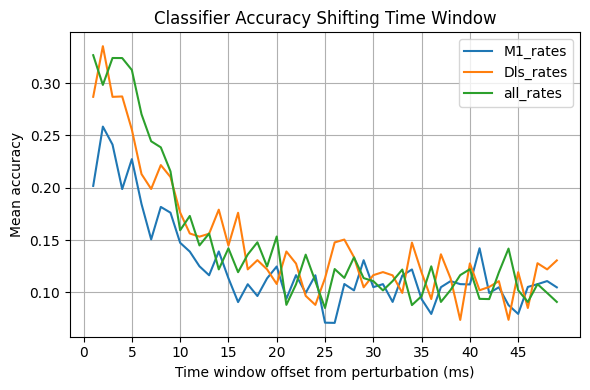

In [163]:
fig = plt.figure(figsize=(6, 4))

for cat in range(len(M044_data['brain_areas'])):
    brain_area = M044_data['brain_areas'][cat]
    area_scores = []

    for time in range(len(time_after_perturbation)):
        mean_score = np.mean(scores_offset[time][cat])  # Average over 6 folds
        area_scores.append(mean_score)

    plt.plot(time_after_perturbation, area_scores, label=brain_area)

plt.title("Classifier Accuracy Shifting Time Window")
plt.xlabel("Time window offset from perturbation (ms)")
plt.ylabel("Mean accuracy")
plt.xticks(np.arange(0, 50, 5))
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# OLD CODE

In [91]:
m044_df_interval = restrict_time_interval(M044_data['data'], M044_data['brain_areas'], M044_data['perturb_time_idx']+5, 60)

In [92]:
m044_pca_data = concat_and_pca(m044_df_interval, M044_data['brain_areas'])

In [93]:
m044_labeled_data = label_data(m044_df_interval, m044_pca_data, M044_data['categories'])

In [94]:
m044_reshaped = pre_decoder_processing(m044_labeled_data, M044_data['categories'])

In [95]:
m044_classifier_scores = classify(m044_reshaped, test_size = 0.1, k_splits = 6)

Control accuracy score on training data: 0.9683544303797469
Test set (10.0% of data) accuracy: 0.25
Mean k-fold score: 0.13086888759010326
Control accuracy score on training data: 0.8449367088607594
Test set (10.0% of data) accuracy: 0.3055555555555556
Mean k-fold score: 0.1762127410870836
Control accuracy score on training data: 0.9082278481012658
Test set (10.0% of data) accuracy: 0.19444444444444445
Mean k-fold score: 0.18132670952659266


In [103]:
print(m044_classifier_scores)

None
